## Exploratory Data Analysis

### A. Visualizations :

In [1]:
import pandas as pd 
import numpy as np

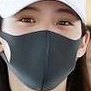

In [2]:
from PIL import Image

well_placed = Image.open(r"/home/vmadmin/HW1/train/train/000013_1.jpg")
display(well_placed)

an example picture of a well placed mask 

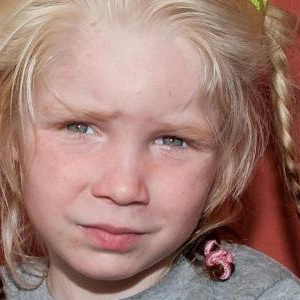

In [3]:
not_placed = Image.open(r"/home/vmadmin/HW1/train/train/000014_0.jpg")
display(not_placed)

an example picture of a person not placing a mask 

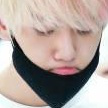

In [4]:
wrongly_placed = Image.open(r"/home/vmadmin/HW1/train/train/000055_0.jpg")
display(wrongly_placed)

an example picture of a wrongly placed mask


### B. Insights from the data 

In [5]:
import os
from os import listdir
count_1s = 0
count_0s = 0
# get the path/directory
folder_dir = r"/home/vmadmin/HW1/train/train"
num_pics = len(os.listdir(folder_dir))
for images in os.listdir(folder_dir):
    # check if the image ends with png
    if (images.endswith("1.jpg")):
        count_1s += 1
print("proportion of train pictures with a well placed masks :" , count_1s/num_pics)
print("proportion of train pictures with a not well placed masks :" , 1 - count_1s/num_pics)


proportion of train pictures with a well placed masks : 0.5448272084999178
proportion of train pictures with a not well placed masks : 0.45517279150008216


In [6]:
import os
from os import listdir
count_1s = 0
count_0s = 0
# get the path/directory
folder_dir = r"/home/vmadmin/HW1/test/test"
num_pics = len(os.listdir(folder_dir))
for images in os.listdir(folder_dir):
    # check if the image ends with png
    if (images.endswith("1.jpg")):
        count_1s += 1
print("proportion of test pictures with a well placed masks :", count_1s/num_pics)
print("proportion of test pictures with a not well placed masks :", 1 - count_1s/num_pics)


proportion of test pictures with a well placed masks : 0.5405849490634242
proportion of test pictures with a not well placed masks : 0.45941505093657575


as we can infer, the proportions of the well\not well placed masks in the train set are pretty close to the proportions of the test set, thus the two classes are balanced in our dataset.

## Experiments

### A. Data loading and pre processing

In [7]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import os
import torch.nn as nn
import torchvision.transforms as transforms
import tarfile
import natsort
from PIL import Image
import pickle

#### defining the transformation for which we will use on the images:<br>we resized each image to the size of (128x128) , transformed it to Tensor and then normalized it .

In [8]:
import torchvision
transform = torchvision.transforms.Compose([
    transforms.Resize(size=(128, 128)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
])

#### Proccessing the train and test folders :<br>
#### 1. reading the train\test images using the os.listdir() command, and then sorting them by their names.
#### 2. splitting each image to a (name,label) format 
#### 3. iterating over the sorted and splitted images and then converting them to RGB type, <br>transforming them using the defined transformation above and then adding their Tensor type to our (train_set\test_set) 

In [9]:
import os
from skimage import io
train_images = []
train_folder_dir = r"/home/vmadmin/HW1/train/train"
train_images_dir = os.listdir(train_folder_dir)
train_images = natsort.natsorted(train_images_dir)


In [10]:
train_set = []
for img in train_images:
    train_set.append({"x": img, "y": int(img[-5])})
train_images = train_set
train_images[:5]

[{'x': '000000_0.jpg', 'y': 0},
 {'x': '000001_0.jpg', 'y': 0},
 {'x': '000002_1.jpg', 'y': 1},
 {'x': '000003_1.jpg', 'y': 1},
 {'x': '000006_0.jpg', 'y': 0}]

In [11]:
train_set = []
for img in train_images:
    img_loc = os.path.join(train_folder_dir, img["x"])
    image = Image.open(img_loc).convert("RGB")
    tensor_image = transform(image)
    train_set.append((tensor_image, torch.tensor(img["y"])))
train_set[:5]

[(tensor([[[-0.6109, -0.5596, -0.4226,  ...,  1.4783,  1.3755,  1.3413],
           [-0.6109, -0.5596, -0.4397,  ...,  1.4954,  1.3927,  1.3755],
           [-0.6281, -0.5938, -0.4911,  ...,  1.5468,  1.4612,  1.4440],
           ...,
           [ 1.6324,  1.6324,  1.6495,  ...,  1.6153,  1.6838,  1.6838],
           [ 1.6153,  1.6324,  1.6667,  ...,  1.6667,  1.7009,  1.7180],
           [ 1.6153,  1.6324,  1.6667,  ...,  1.6838,  1.7180,  1.7180]],
  
          [[ 0.0826,  0.1001,  0.1702,  ...,  0.5728,  0.4678,  0.4328],
           [ 0.0826,  0.1001,  0.1527,  ...,  0.5903,  0.4853,  0.4678],
           [ 0.0651,  0.0826,  0.1352,  ...,  0.6429,  0.5553,  0.5378],
           ...,
           [-1.1253, -1.1253, -1.1253,  ..., -1.1078, -1.0553, -1.0553],
           [-1.1429, -1.1429, -1.1078,  ..., -1.0728, -1.0378, -1.0378],
           [-1.1429, -1.1429, -1.1078,  ..., -1.0728, -1.0378, -1.0378]],
  
          [[ 1.0888,  1.0888,  1.0714,  ...,  0.4614,  0.3742,  0.3393],
           

In [12]:
import os
from skimage import io
train_images = []
test_folder_dir = r"/home/vmadmin/HW1/test/test"
test_images_dir = os.listdir(test_folder_dir)
test_images = natsort.natsorted(test_images_dir)


In [13]:
test_set = []
for img in test_images:
    test_set.append({"x": img, "y": int(img[-5])})
test_images = test_set
test_images[:5]

[{'x': '000012_0.jpg', 'y': 0},
 {'x': '000022_1.jpg', 'y': 1},
 {'x': '000030_0.jpg', 'y': 0},
 {'x': '000041_1.jpg', 'y': 1},
 {'x': '000046_1.jpg', 'y': 1}]

In [14]:
import os
from skimage import io
train_images = []
test_folder_dir = r"/home/vmadmin/HW1/test/test"
test_images_dir = os.listdir(test_folder_dir)
test_images = natsort.natsorted(test_images_dir)

In [15]:
test_set = []
for img in test_images:
    test_set.append({"x": img, "y": int(img[-5])})
test_images = test_set
test_images[:5]

[{'x': '000012_0.jpg', 'y': 0},
 {'x': '000022_1.jpg', 'y': 1},
 {'x': '000030_0.jpg', 'y': 0},
 {'x': '000041_1.jpg', 'y': 1},
 {'x': '000046_1.jpg', 'y': 1}]

In [16]:
test_set = []
for img in test_images:
    img_loc = os.path.join(test_folder_dir, img["x"])
    image = Image.open(img_loc).convert("RGB")
    tensor_image = transform(image)
    test_set.append((tensor_image, torch.tensor(img["y"])))
test_set[:5]

[(tensor([[[-1.9467, -1.9295, -1.9467,  ...,  0.6392,  0.6392,  0.6392],
           [-1.9809, -1.9638, -1.9638,  ...,  0.6221,  0.6221,  0.6221],
           [-1.9638, -1.9638, -1.9809,  ...,  0.6049,  0.6221,  0.6221],
           ...,
           [-1.5699, -1.5870, -1.5870,  ..., -0.1486,  0.3138,  0.7248],
           [-1.1932, -1.3644, -1.4500,  ..., -0.5253, -0.5082, -0.3883],
           [-0.5596, -0.9192, -1.2445,  ..., -0.2856, -0.4397, -0.6452]],
  
          [[-1.9657, -1.9482, -1.9657,  ...,  0.8529,  0.8529,  0.8529],
           [-1.9657, -1.9482, -1.9482,  ...,  0.8354,  0.8354,  0.8354],
           [-1.9482, -1.9482, -1.9482,  ...,  0.8529,  0.8354,  0.8354],
           ...,
           [-1.8957, -1.8606, -1.8957,  ..., -0.4251,  0.1001,  0.5378],
           [-1.9657, -1.9832, -1.9832,  ..., -0.8452, -0.7752, -0.6352],
           [-2.0007, -2.0357, -2.0182,  ..., -0.6176, -0.7227, -0.9153]],
  
          [[-1.6999, -1.6824, -1.6999,  ...,  1.2631,  1.2631,  1.2631],
           

In [17]:
# Hyper Parameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [18]:
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                          batch_size=batch_size, 
                                          shuffle=False)


### B. Architecture 

#### We tried 3 different Architectures:<br>
1.an architecture with 2 layers and a ReLu  activation function, 2. another with 3 layers and ELU activation function and 3. the final architecture which obtained the best results(the one called CNN), consisted of 4 layers, with the format of : 3->16->32->64->512->(linear network with 32768) transformations, with the ReLu activation function and the logsoftmax loss .

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 512, kernel_size=5, padding=2),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.fc = nn.Linear(32768, 2)
        self.dropout = nn.Dropout(p=0.5)
        self.logsoftmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0),-1)
        out = self.dropout(out)
        out = self.fc(out)        
        return self.logsoftmax(out)
    

In [20]:
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.fc = nn.Linear(32*32*32, 2)
        self.dropout = nn.Dropout(p=0.7)
        self.MSELoss = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc(out)        
        return self.logsoftmax(out)
    

In [21]:
class CNN3(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            nn.ELU,
            nn.MaxPool2d(2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.fc1 = nn.Linear(8192, 2)
        self.dropout = nn.Dropout(p=0.9)
        self.tanh = nn.Tanh()

    def forward(self, x_):
        out = self.layer1(x_)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
#         out = self.layer5(out)
#         out = self.layer6(out)
#         out = self.layer7(out)
#         out = self.layer8(out)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc1(out)
        return out

# C.Loss Functions + D.Optimizers + E.Regularization

Loss functions:

We tried several loss functions on the model. We tried the Cross Entropy loss function, the MSE loss function and the NLL loss function. In the end we chose the one that gave us the best results which was the NLL loss

Optimizers+Regularization:

In addition, We tried several optimizers such as the Adam optimizer and the SGD with momentum optimizer. In the end we chose the Adam optimizer but we added to it weight_decay of 1e-5 which gives the model some regularization.

You can see below our attempts and the results of the model which we ended up choosing.

In [22]:
cnn = CNN()

if torch.cuda.is_available():
    cnn = cnn.cuda()
    
# convert all the weights tensors to cuda()
# Loss and Optimizer
#tried : criterion = nn.CrossEntropyLoss()
#tried: criterion = nn.MSELoss
criterion = nn.NLLLoss() 
# tried : optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate, momentum=1 -learning_rate)
#tried : optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)
# built-in reguralisation
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate,weight_decay=1e-5)
print('number of parameters: ', sum(param.numel() for param in cnn.parameters()))

number of parameters:  951810


In [23]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        # Forward + Backward + Optimize
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 37 == 0 or i+1==len(train_set)//batch_size:
            print('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1,
                     len(train_set)//batch_size, loss.data))
            

Epoch [1/5], Iter [37/182] Loss: 0.3142
Epoch [1/5], Iter [74/182] Loss: 0.2454
Epoch [1/5], Iter [111/182] Loss: 0.3530
Epoch [1/5], Iter [148/182] Loss: 0.2045
Epoch [1/5], Iter [182/182] Loss: 0.0907
Epoch [2/5], Iter [37/182] Loss: 0.2137
Epoch [2/5], Iter [74/182] Loss: 0.2277
Epoch [2/5], Iter [111/182] Loss: 0.0839
Epoch [2/5], Iter [148/182] Loss: 0.4344
Epoch [2/5], Iter [182/182] Loss: 0.2847
Epoch [3/5], Iter [37/182] Loss: 0.1287
Epoch [3/5], Iter [74/182] Loss: 0.1732
Epoch [3/5], Iter [111/182] Loss: 0.6186
Epoch [3/5], Iter [148/182] Loss: 0.2215
Epoch [3/5], Iter [182/182] Loss: 0.1697
Epoch [4/5], Iter [37/182] Loss: 0.3035
Epoch [4/5], Iter [74/182] Loss: 0.3095
Epoch [4/5], Iter [111/182] Loss: 0.1069
Epoch [4/5], Iter [148/182] Loss: 0.1832
Epoch [4/5], Iter [182/182] Loss: 0.2791
Epoch [5/5], Iter [37/182] Loss: 0.1314
Epoch [5/5], Iter [74/182] Loss: 0.1019
Epoch [5/5], Iter [111/182] Loss: 0.1831
Epoch [5/5], Iter [148/182] Loss: 0.2391
Epoch [5/5], Iter [182/182

In [24]:
cnn.eval() 
correct = 0
total = 0

for images, labels in test_loader:
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 95 %


In [25]:
torch.save(cnn.state_dict(), 'model.pkl')

In [26]:
test_labels = []
train_labels = []
train_predictions = []
test_predictions = []

train_losses = []
test_losses = []

tp_rates_train = []
tp_rates_test = []
fp_rates_train = []
fp_rates_test = []

F1_ratio_train = []
F1_ratio_test = []

In [27]:
for epoch in range(num_epochs):
    print(f'epoch: {epoch+1}')
    cnn.train()
    train_total_loss = 0
    total_train = 0
    train_tp = 0
    train_fp = 0
    train_fn = 0
    for images, labels in train_loader:
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        # Forward + Backward + Optimize
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        total_train += labels.size(0)
        train_total_loss += float(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        if epoch == num_epochs-1:
            train_predictions.append(predicted)
            train_labels.append(labels)
        train_tp += int(((predicted + labels) == 2).sum().item())
        train_fn += int(((labels - predicted) == 1).sum().item())
        train_fp += int(((labels - predicted) == -1).sum().item())
    F1_score_train = (2 * train_tp) / ((2 * train_tp) + train_fp + train_fn)
    
    cnn.eval()
    total_loss_test = 0
    F1_score_test = 0
    total_test = 0
    test_tp = 0
    test_fp = 0
    test_fn = 0
    for images, labels in test_loader:
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        outputs = cnn(images)
        loss = criterion(outputs, labels)
        total_test += labels.size(0)
        total_loss_test += float(loss.item())
        _, predicted = torch.max(outputs.data, 1)
        if epoch == num_epochs-1:
            test_predictions.append(predicted)
            test_labels.append(labels)
        test_tp += int(((predicted + labels) == 2).sum().item())
        test_fn += int(((labels - predicted) == 1).sum().item())
        test_fp += int(((labels - predicted) == -1).sum().item())
    F1_score_test = (2 * test_tp) / ((2 * test_tp) + test_fp + test_fn)
    
    train_losses.append(train_total_loss)
    test_losses.append(total_loss_test)

    fp_rates_train.append(train_fp / total_train)
    tp_rates_train.append(train_tp / total_train)
    fp_rates_test.append(test_fp / total_test)
    tp_rates_test.append(test_tp / total_test)

    F1_ratio_train.append(F1_score_train)
    F1_ratio_test.append(F1_score_test)
    
    print(f'Train F1: {F1_score_train}, Test F1: {F1_score_test}')

epoch: 1
Train F1: 0.9568796747151247, Test F1: 0.9608114338404795
epoch: 2
Train F1: 0.9602532536053464, Test F1: 0.9577965348733896
epoch: 3
Train F1: 0.9631710988459609, Test F1: 0.9681274900398407
epoch: 4
Train F1: 0.9697182744940491, Test F1: 0.9652451054788284
epoch: 5
Train F1: 0.9693836579000201, Test F1: 0.9691442468460252


# F. Train + Test loss graph

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


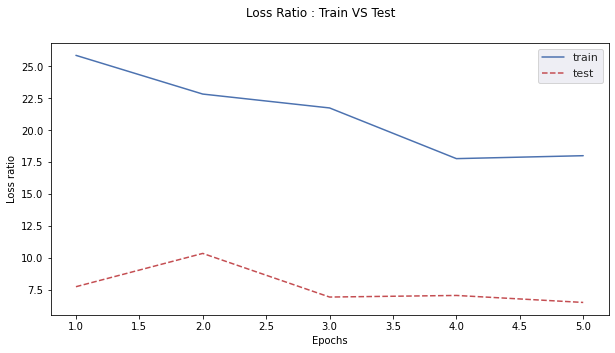

In [29]:
import pandas as pd
losses_dict = {"epochs":[1,2,3,4,5],"train_losses":train_losses,"test_losses":test_losses}
losses_df = pd.DataFrame(losses_dict)
fig, axs = plt.subplots(1,1)
fig.set_size_inches(10 ,5)
fig.suptitle('Loss Ratio : Train VS Test')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss ratio')
sns.set_theme(style="darkgrid")
axs.plot(losses_dict["epochs"],losses_dict["train_losses"],'-b',label = 'train')
axs.plot(losses_dict["epochs"],losses_dict["test_losses"],'--r',label = 'test')
axs.legend()

# G. Train + Test ROC AUC graphs

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def draw_roc_curve(actual, predictions, pos_label):
    fpr, tpr, t = roc_curve(actual, predictions, pos_label=pos_label)
    roc_auc = auc(fpr, tpr) # calculate area under the curve (AUC)

    plt.plot(fpr, tpr, color='blue')
    plt.plot([0, 1], [0, 1], 'k:') # create the diagonal line. k is for black color and : is for a dotted line style
    plt.xlim(0, 1.01)
    plt.ylim(0, 1.01)
    plt.text(0.2, 0.7, "AUC: {:.2f}".format(roc_auc)) # print the AUC

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


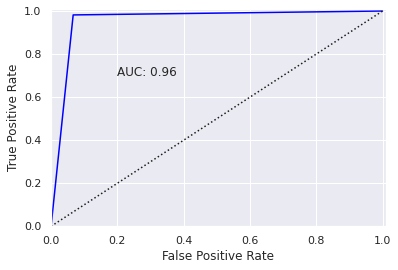

In [31]:
draw_roc_curve(train_labels[4],train_predictions[4],1)

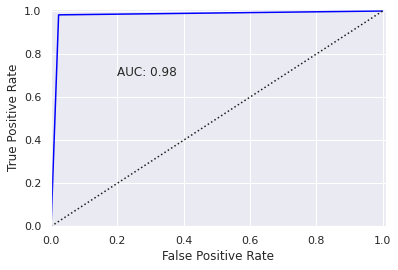

In [32]:
draw_roc_curve(test_labels[4],test_predictions[4],1)


# H.Train + Test F1 graph 

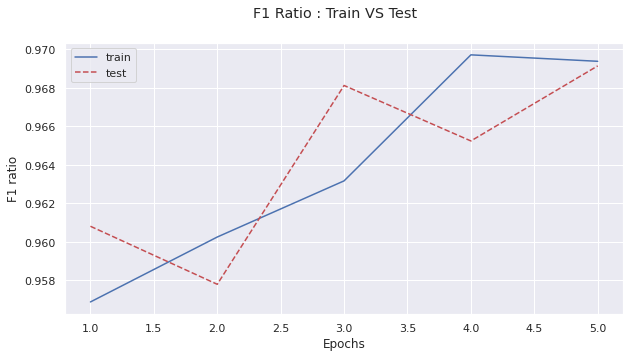

In [35]:
F1_dict = {"epochs":[1,2,3,4,5],"train_F1":F1_ratio_train,"test_F1":F1_ratio_test}
F1_df = pd.DataFrame(F1_dict)
fig, axs = plt.subplots(1,1)
fig.set_size_inches(10 ,5)
fig.suptitle('F1 Ratio : Train VS Test')
axs.set_xlabel('Epochs')
axs.set_ylabel('F1 ratio')
sns.set_theme(style="darkgrid")
axs.plot(F1_dict["epochs"],F1_dict["train_F1"],'-b',label = 'train')
axs.plot(F1_dict["epochs"],F1_dict["test_F1"],'--r',label = 'test')
axs.legend()

# I. Conclusions

#### After trying several network archetictures,<br>we concluded that the best archeticture obtained is the final architecture(the one called CNN), which consisted of 4 layers, with the format of : 3->16->32->64->512->(linear network with 32768) transformations, with the ReLu activation function and the logsoftmax loss,<br><br>From the Train\Test loss ratio graph, we can see that the train loss monotonically decreased but the test loss is constintly low <br><br>From the Train + Test ROC AUC graphs, we can infer that for both the train and the test loss, we got a great tp/fp rate<br><br>From the Train + Test F1 graph, for both the train and test we can see that with higher epochs the F1 ratio gets an overall growth<br><br>by which we concluded that for an images dataset of size (~ 18K train data,~ 6K test data), a convolution neural network for classifying them with 4 layers is enough to obtain a satisfying results(and by satisfying we mean F1 score of ~ 96%) 
